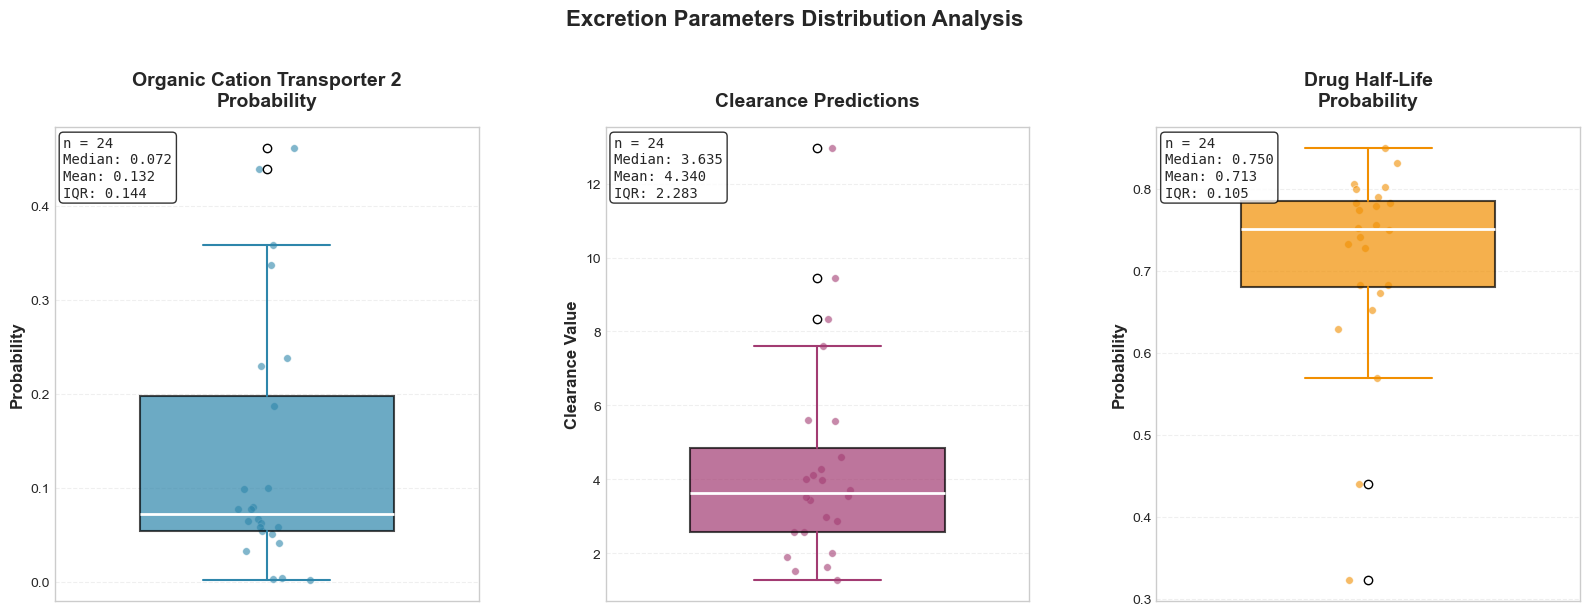

📊 EXCRETION PARAMETERS - DETAILED STATISTICS

OCT2 Probability:
------------------------------
Sample size (n):        24
Mean:                   0.1324
Median:                 0.0720
Standard deviation:     0.1376
Minimum:                0.0020
25th percentile:        0.0532
75th percentile:        0.1975
Maximum:                0.4610
IQR:                    0.1443
Missing values:          0

Clearance Predictions:
------------------------------
Sample size (n):        24
Mean:                   4.3396
Median:                 3.6350
Standard deviation:     2.7889
Minimum:                1.2900
25th percentile:        2.5700
75th percentile:        4.8525
Maximum:               12.9500
IQR:                    2.2825
Missing values:          0

Half-Life Probability:
------------------------------
Sample size (n):        24
Mean:                   0.7126
Median:                 0.7505
Standard deviation:     0.1230
Minimum:                0.3230
25th percentile:        0.6798
75th perc

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# ==============================
# Read the Excel file
# ==============================
df = pd.read_excel('cuasinoides.xlsx', sheet_name="pkcsm")

# ==============================
# Output directory (already exists)
# ==============================
OUTPUT_DIR = "4.Excreción"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ==============================
# Select required columns
# ==============================
selected_columns = [
    '[Excretion/Organic Cation Transporter 2] Probability',
    '[Excretion/Clearance] Predictions',
    '[Excretion/Half-Life of Drug] Probability'
]

df_selected = df[selected_columns]

# ==============================
# Clean column names
# ==============================
clean_names = {
    '[Excretion/Organic Cation Transporter 2] Probability': 'OCT2\nProbability',
    '[Excretion/Clearance] Predictions': 'Clearance\nPredictions',
    '[Excretion/Half-Life of Drug] Probability': 'Half-Life\nProbability'
}

df_clean = df_selected.rename(columns=clean_names)

# ==============================
# Plotting style
# ==============================
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

fig, axes = plt.subplots(1, 3, figsize=(16, 6))

colors = ['#2E86AB', '#A23B72', '#F18F01']

def create_enhanced_boxplot(ax, data, title, color, ylabel):
    boxprops = dict(facecolor=color, alpha=0.7, linewidth=1.5)
    whiskerprops = dict(color=color, linewidth=1.5)
    capprops = dict(color=color, linewidth=1.5)
    medianprops = dict(color='white', linewidth=2)

    ax.boxplot(
        data.dropna(),
        patch_artist=True,
        boxprops=boxprops,
        whiskerprops=whiskerprops,
        capprops=capprops,
        medianprops=medianprops,
        widths=0.6
    )

    y = data.dropna()
    x = np.random.normal(1, 0.04, size=len(y))
    ax.scatter(
        x, y, alpha=0.6, color=color,
        s=30, edgecolors='white', linewidth=0.5
    )

    ax.set_title(title, fontsize=14, fontweight='bold', pad=15)
    ax.set_ylabel(ylabel, fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.set_axisbelow(True)
    ax.set_xticks([])

    stats = {
        'Median': data.median(),
        'Mean': data.mean(),
        'Q1': data.quantile(0.25),
        'Q3': data.quantile(0.75)
    }

    text_str = (
        f"n = {len(y)}\n"
        f"Median: {stats['Median']:.3f}\n"
        f"Mean: {stats['Mean']:.3f}\n"
        f"IQR: {stats['Q3'] - stats['Q1']:.3f}"
    )

    ax.text(
        0.02, 0.98, text_str,
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
        fontfamily='monospace'
    )

# ==============================
# Create plots
# ==============================
create_enhanced_boxplot(
    axes[0],
    df_clean['OCT2\nProbability'],
    'Organic Cation Transporter 2\nProbability',
    colors[0],
    'Probability'
)

create_enhanced_boxplot(
    axes[1],
    df_clean['Clearance\nPredictions'],
    'Clearance Predictions',
    colors[1],
    'Clearance Value'
)

create_enhanced_boxplot(
    axes[2],
    df_clean['Half-Life\nProbability'],
    'Drug Half-Life\nProbability',
    colors[2],
    'Probability'
)

plt.suptitle(
    'Excretion Parameters Distribution Analysis',
    fontsize=16,
    fontweight='bold',
    y=1.02
)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)

# ==============================
# Save figure in existing folder
# ==============================
output_path = os.path.join(OUTPUT_DIR, "excretion.png")
plt.savefig(output_path, dpi=350, bbox_inches='tight')

plt.show()

# ==============================
# Print detailed statistics
# ==============================
print("📊 EXCRETION PARAMETERS - DETAILED STATISTICS")
print("=" * 55)

for col in df_clean.columns:
    data = df_clean[col].dropna()
    print(f"\n{col.replace(chr(10), ' ')}:")
    print("-" * 30)
    print(f"Sample size (n):    {len(data):>6}")
    print(f"Mean:               {data.mean():>10.4f}")
    print(f"Median:             {data.median():>10.4f}")
    print(f"Standard deviation: {data.std():>10.4f}")
    print(f"Minimum:            {data.min():>10.4f}")
    print(f"25th percentile:    {data.quantile(0.25):>10.4f}")
    print(f"75th percentile:    {data.quantile(0.75):>10.4f}")
    print(f"Maximum:            {data.max():>10.4f}")
    print(f"IQR:                {data.quantile(0.75) - data.quantile(0.25):>10.4f}")
    print(f"Missing values:     {df_clean[col].isna().sum():>6}")

print("=" * 55)


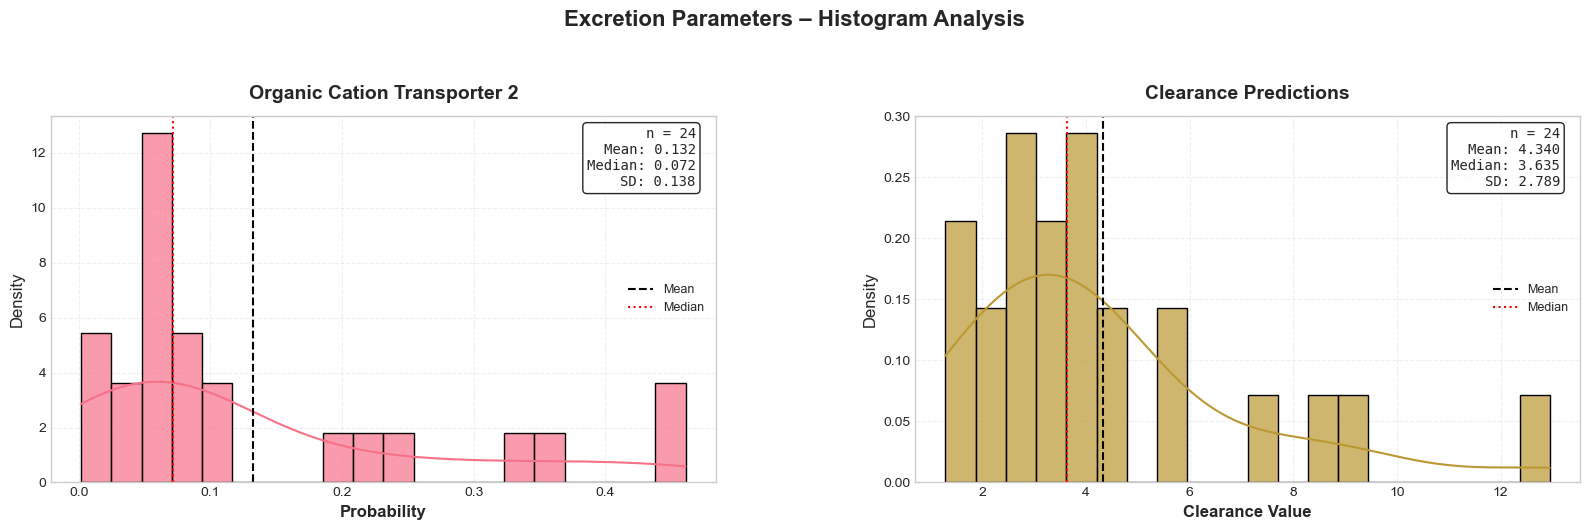

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# ==============================
# Read the Excel file
# ==============================
df = pd.read_excel('cuasinoides.xlsx', sheet_name="pkcsm")

# ==============================
# Output directory (already exists)
# ==============================
OUTPUT_DIR = "4.Excreción"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ==============================
# Select required columns
# ==============================
selected_columns = [
    '[Excretion/Organic Cation Transporter 2] Probability',
    '[Excretion/Clearance] Predictions',
    '[Excretion/Half-Life of Drug] Probability'
]

df_selected = df[selected_columns]

# ==============================
# Clean column names
# ==============================
clean_names = {
    '[Excretion/Organic Cation Transporter 2] Probability': 'OCT2 Probability',
    '[Excretion/Clearance] Predictions': 'Clearance Predictions',
}

df_clean = df_selected.rename(columns=clean_names)

# ==============================
# Plotting style
# ==============================
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# ==============================
# Histogram plotting function
# ==============================
def create_histogram(ax, data, title, xlabel, color):
    data = data.dropna()

    sns.histplot(
        data,
        bins=20,
        kde=True,
        stat="density",
        ax=ax,
        color=color,
        edgecolor="black",
        alpha=0.7
    )

    ax.set_title(title, fontsize=14, fontweight='bold', pad=12)
    ax.set_xlabel(xlabel, fontsize=12, fontweight='bold')
    ax.set_ylabel("Density", fontsize=12)
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.set_axisbelow(True)

    # Statistical annotations
    mean = data.mean()
    median = data.median()
    std = data.std()

    ax.axvline(mean, color='black', linestyle='--', linewidth=1.5, label='Mean')
    ax.axvline(median, color='red', linestyle=':', linewidth=1.5, label='Median')

    ax.legend(fontsize=9)

    text_str = (
        f"n = {len(data)}\n"
        f"Mean: {mean:.3f}\n"
        f"Median: {median:.3f}\n"
        f"SD: {std:.3f}"
    )

    ax.text(
        0.97, 0.97, text_str,
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment='top',
        horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.85),
        fontfamily='monospace'
    )

# ==============================
# Create histograms
# ==============================
create_histogram(
    axes[0],
    df_clean['OCT2 Probability'],
    'Organic Cation Transporter 2',
    'Probability',
    sns.color_palette()[0]
)

create_histogram(
    axes[1],
    df_clean['Clearance Predictions'],
    'Clearance Predictions',
    'Clearance Value',
    sns.color_palette()[1]
)

# ==============================
# Global title and layout
# ==============================
plt.suptitle(
    'Excretion Parameters – Histogram Analysis',
    fontsize=16,
    fontweight='bold',
    y=1.05
)

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)

# ==============================
# Save figure
# ==============================
output_path = os.path.join(OUTPUT_DIR, "excretion_histograms.png")
plt.savefig(output_path, dpi=350, bbox_inches='tight')

plt.show()


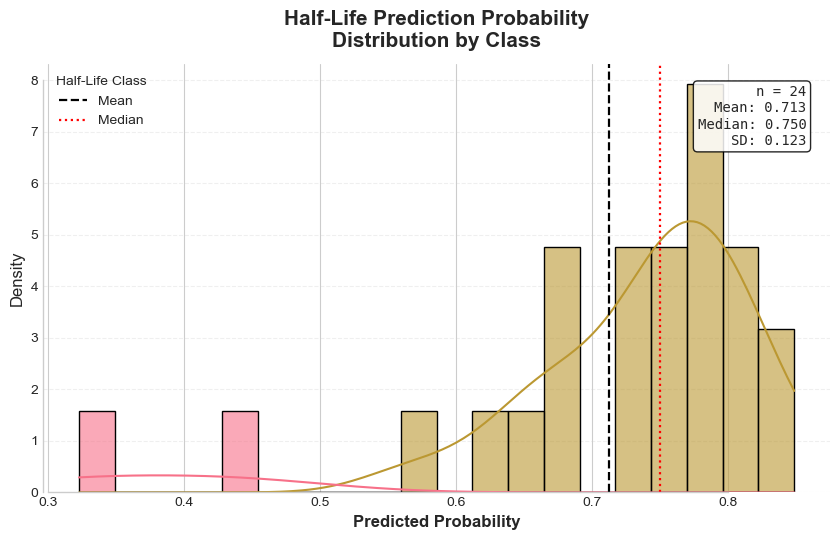

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ==============================
# Read data
# ==============================
df = pd.read_excel("cuasinoides.xlsx", sheet_name="pkcsm")

OUTPUT_DIR = "4.Excreción"
os.makedirs(OUTPUT_DIR, exist_ok=True)
# ==============================
# Extract Half-Life columns
# ==============================
df_half_life = df[[
    "[Excretion/Half-Life of Drug] Probability",
    "[Excretion/Half-Life of Drug] Interpretation"
]].dropna()

# ==============================
# Clean interpretation → Class
# ==============================
df_half_life["HalfLife_Class"] = (
    df_half_life["[Excretion/Half-Life of Drug] Interpretation"]
    .str.extract(r"(Half-Life\s*[<>]=?\s*\d+hs)")
)

df_half_life = df_half_life.rename(columns={
    "[Excretion/Half-Life of Drug] Probability": "HalfLife_Probability"
})

# ==============================
# Plot style
# ==============================
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("husl")

# ==============================
# Create histogram
# ==============================
plt.figure(figsize=(8.5, 5.5))

sns.histplot(
    data=df_half_life,
    x="HalfLife_Probability",
    hue="HalfLife_Class",
    bins=20,
    kde=True,
    stat="density",
    alpha=0.6,
    edgecolor="black"
)

# ==============================
# Global statistics
# ==============================
mean = df_half_life["HalfLife_Probability"].mean()
median = df_half_life["HalfLife_Probability"].median()
std = df_half_life["HalfLife_Probability"].std()

plt.axvline(mean, color="black", linestyle="--", linewidth=1.6, label="Mean")
plt.axvline(median, color="red", linestyle=":", linewidth=1.6, label="Median")

# ==============================
# Titles & labels
# ==============================
plt.title(
    "Half-Life Prediction Probability\nDistribution by Class",
    fontsize=15,
    fontweight="bold",
    pad=12
)

plt.xlabel("Predicted Probability", fontsize=12, fontweight="bold")
plt.ylabel("Density", fontsize=12)

# ==============================
# Annotation box
# ==============================
text_str = (
    f"n = {len(df_half_life)}\n"
    f"Mean: {mean:.3f}\n"
    f"Median: {median:.3f}\n"
    f"SD: {std:.3f}"
)

plt.text(
    0.97, 0.95,
    text_str,
    transform=plt.gca().transAxes,
    fontsize=10,
    verticalalignment="top",
    horizontalalignment="right",
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.85),
    fontfamily="monospace"
)

# ==============================
# Cleanup
# ==============================
sns.despine(trim=True)
plt.grid(axis="y", alpha=0.3, linestyle="--")
plt.legend(title="Half-Life Class", fontsize=10)
plt.tight_layout()
plt.savefig(
    os.path.join(OUTPUT_DIR, "half-life_HIST.png"),
    dpi=350,
    bbox_inches="tight")
plt.show()
